### Introduction to Machine Learning with Python
## Chapter 2. 지도학습
---
# 선형회귀 (Linear Regression)

- 회귀는 데이터가 주어졌을 때, **실수값**인 타겟값(또는 목표값)을 예측하는 방법이다.

나이 | 성별 | 키  | 몸무계
-----|------|-----|-------
35   | 남   | 175 | 67
...  | ...  | ... | ...
27   | 여   | 163 | 52

- 위와 같은 데이터가 주어졌을 때, 키(데이터)에 따른 몸무계(타겟값)를 예측하는 것은 회귀 문제이다.
- 회귀 중에서도, 직선 또는 곧은 평면(굽은 평면이 아님)으로 타겟값을 예측하는 것을 **선형회귀** 라고 한다. 아래 그림에서 직선으로 예측한 경우에 해당한다.

<img src="ch02_02.png" />
<p style="text-align: center;">(출처 : wikipedia - overfitting)</p>

- 속성이 하나 뿐일 때는 위와 같이 직선으로 표현할 수 있지만 속성이 2개일 때는 곧은 평면, 3개 이상에서는 초평면으로 표현한다.

<img src="ch02_03.jpg" />
<p style="text-align: center;">(출처 : https://www.dataquest.io/blog/statistical-learning-for-predictive-modeling-r/)</p>

- 선형회귀에서 굳이 타겟값을 별도로 구분했지만, 다르게 표현하면 타겟값을 포함한 모든 속성의 상관관계를 평면으로 표현한 것으로 이해할 수 있다.
- 아래에서 Iris 데이터를 가지고 선형회귀를 적용해 보겠다.

In [26]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

Populating the interactive namespace from numpy and matplotlib


In [27]:
X.shape

(150, 4)

In [2]:
for i in iris:
    print(i)

data
target
target_names
DESCR
feature_names


In [3]:
np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

In [4]:
iris.target[iris.target==0].shape

(50,)

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000097CAAC8>,
      dtype=object)

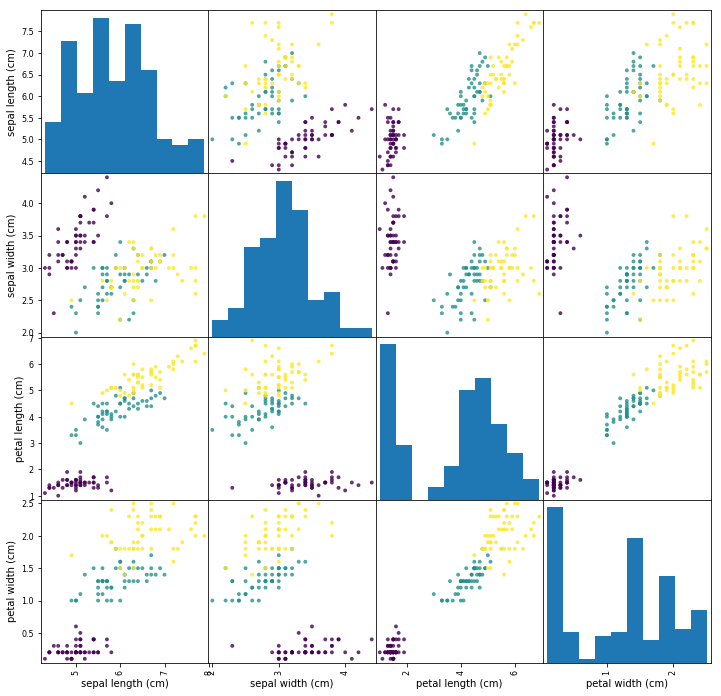

In [8]:
import pandas as pd

iris_df = pd.DataFrame(X, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=y, s=60, alpha=0.8, figsize=[12,12])

- 위의 산점도에서 각 속성들 간의 상관관계를 짐작해 볼 수 있다.
- 위의 그림은 pandas 를 이용했지만 numpy 로 직접 그림을 그려보자.

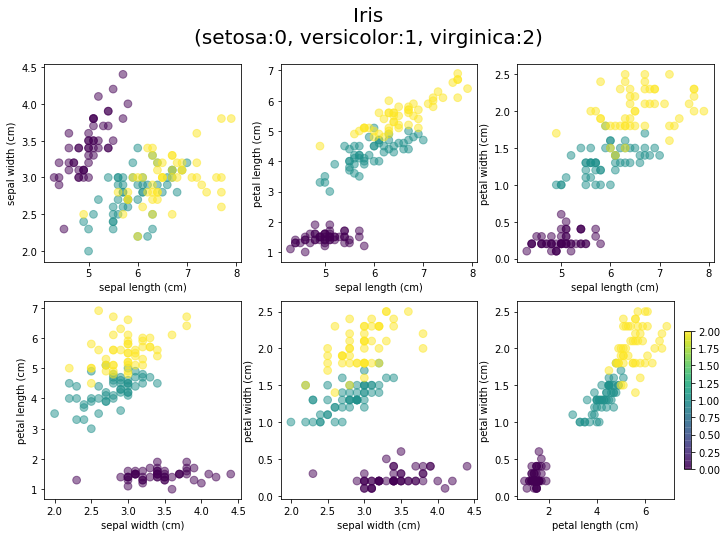

In [28]:
fig=plt.figure(figsize=[12,8])
fig.suptitle('Iris\n(setosa:0, versicolor:1, virginica:2)',fontsize=20)
count=0

for i in range(3):
    for j in range(i+1,4):
        count+=1
        plt.subplot(2,3,count)
        plt.scatter(X[:,i],X[:,j],c=y,s=60,alpha=0.5)
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])

plt.colorbar(shrink=0.7)

- 위의 산점도에서 가장 크게 선형관계를 가지는 것은 petal length 와 petal width 이다.
- 아래에서 이 두 속성간의 상관관계를 직선으로 표현해 보자.
>참고 : 이 경우 petal length 가 데이터가 되고, petal width 가 타겟값이 된다. 반대로 적용해도 결과는 같다.

In [29]:
from sklearn.linear_model import LinearRegression

col1=1
col2=3

model = LinearRegression()
model.fit(X[:, col1].reshape(-1,1), X[:, col2]) # reshape() 함수에 주의

w = model.coef_[0] # 기울기
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = -0.627546175649529
b = 3.115192687100328


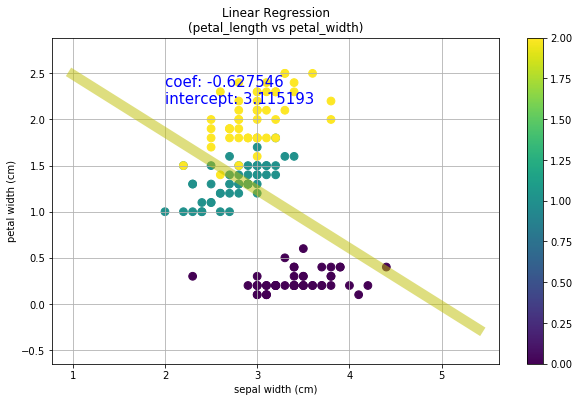

In [32]:
fig=plt.figure(figsize=(10,6))
plt.title('Linear Regression\n(petal_length vs petal_width)')

plt.scatter(X[:,col1],X[:,col2],c=y,s=60)
plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.colorbar()

x1 = X[:,col1].min()-1
x2 = X[:,col1].max()+1

plt.plot([x1, x2],[x1*w+b,x2*w+b],'y',lw=10,alpha=0.5)
plt.text(x1+1, x1*w+b,'coef: %f\nintercept: %f' % (w,b), va='top', fontsize=15,color='b')
plt.axis('equal')
plt.grid()

In [34]:
result = model.predict([[1],[3],[5]])
display(result, 3*w+b)

array([ 2.48764651,  1.23255416, -0.02253819])

1.2325541601517411

In [36]:
pred_y = model.predict(X[:,col1].reshape(-1,1))
pred_y

array([0.91878107, 1.23255416, 1.10704493, 1.16979954, 0.85602645,
       0.6677626 , 0.98153569, 0.98153569, 1.29530878, 1.16979954,
       0.79327184, 0.98153569, 1.23255416, 1.23255416, 0.60500798,
       0.35398951, 0.6677626 , 0.91878107, 0.73051722, 0.73051722,
       0.98153569, 0.79327184, 0.85602645, 1.04429031, 0.98153569,
       1.23255416, 0.98153569, 0.91878107, 0.98153569, 1.10704493,
       1.16979954, 0.98153569, 0.54225337, 0.47949875, 1.16979954,
       1.10704493, 0.91878107, 1.16979954, 1.23255416, 0.98153569,
       0.91878107, 1.67183648, 1.10704493, 0.91878107, 0.73051722,
       1.23255416, 0.73051722, 1.10704493, 0.79327184, 1.04429031,
       1.10704493, 1.10704493, 1.16979954, 1.67183648, 1.3580634 ,
       1.3580634 , 1.04429031, 1.60908187, 1.29530878, 1.42081801,
       1.86010034, 1.23255416, 1.7345911 , 1.29530878, 1.29530878,
       1.16979954, 1.23255416, 1.42081801, 1.7345911 , 1.54632725,
       1.10704493, 1.3580634 , 1.54632725, 1.3580634 , 1.29530

In [37]:
score = model.score(X[:,col1].reshape(-1,1), X[:,col2])
display(score) # R^2 값

0.12712368783853756

- 회귀에서의 평가 점수는 $R^2$ 이라는 것을 사용한다.<br>

> $R^2 = 1 - \frac{\sum (y-\hat{y})^2} {\sum (y-\bar{y})^2} $  ($\bar{y}$ 는 평균, $\hat{y}$ 는 예측값)<br>
> $R^2$ 값이 1 이면 완벽하게 예측했다는 의미이고, 0 이면 누구나 하듯이 평균값으로 에측했다는 의미이다. 그리고 음수이면 평균값 예측보다도 못하다는 의미가 된다.

- 앞에서 model.fit() 을 하고 나면, model.coef\_ 으로 기울기 값을 model.intercept\_ 로 y절편 값을 얻을 수 있다.
- 그런데 앞의 예제는 앞에서 중요하게 강조했던 학습세트와 테스트세트로 분리하지 않았다. 그냥 전체 데이터를 사용하여 두 속성의 상관관계 만을 알고 싶었기 때문이다.
- 하지만 제대로 머신러닝 과정을 밟기 위해 아래에서 학습세트와 테스트세트로 분리하여 적용해 보자. 이렇게 하면 여러가지 예측모델 중에서 어떤 예측모델이 더 나은지 판단할 수 있게 된다.

In [43]:
from sklearn.model_selection import train_test_split

X = iris.data[:,2].reshape(-1,1) # reshape() 함수에 주의
y = iris.data[:,3]

X_train,X_test,y_train,y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)

w = model.coef_[0] # 기울기
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = 0.4169951309993044
b = -0.3726814282402038


In [48]:
y.shape

(150,)

In [50]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=iris.target)


ValueError: object too deep for desired array

In [15]:
score1 = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
display('학습세트 점수: %f' % score1, '테스트세트 점수: %f' % score2) # R^2 값

'학습세트 점수: 0.928836'

'테스트세트 점수: 0.906728'

In [39]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int, None, optional
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, the value is set 

- 결과에서 보듯이 테스트세트에 대한 $R^2$ 값이 학습세트에 대한 값 보다 못한 결과를 얻었다.
- 이것은 당연한데, 학습에 사용하지 않은 데이터로 테스트를 했기 때문이다.

- 이제 다른 방법으로 학습 결과를 평가해 보자.
- RMSE(root-mean-square error) = $\sqrt{\frac{(y-\hat{y})^2} {N} }$ , (RMSE 는 값이 작을 수록 결과가 좋은 것이다.)
- 선형회귀의 수학적 원리는 RMSE 를 최소화 하는 초평면을 찾는 것이다.

In [16]:
pred_y = model.predict(X_test)
pred_y

array([0.27486971, 1.51807534, 0.89647252, 1.9739174 , 1.22799402,
       1.68383609, 1.93247721, 0.27486971, 1.60095571, 1.6423959 ,
       0.27486971, 0.19198933, 1.43519496, 0.3163099 , 1.9739174 ,
       0.23342952, 1.84959684, 1.35231459, 0.23342952, 0.3163099 ,
       1.39375477, 0.15054915, 1.55951553, 1.02079309, 0.44063046,
       0.23342952, 1.76671646, 1.60095571, 0.27486971, 0.27486971,
       0.35775008, 0.27486971, 1.39375477, 1.60095571, 0.44063046,
       0.23342952, 2.26399872, 1.14511365])

In [17]:
RMSE = np.sqrt(((y_test - pred_y)**2).sum())/len(y_test)
RMSE

0.03546535823506878

- 이제 타겟값인 petal_width 를 제외한 나머지 세가지 속성을 모두 사용하여 선형회귀를 적용해 보자.
- 이럴 경우, 4차원 상에 3차원 초평면으로 예측하기 때문에 그림으로 결과를 표현하기는 쉽지 않다.

In [58]:
X = iris.data[:,:3]
y = iris.data[:,3]

X_train,X_test,y_train,y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)

w = model.coef_ # 기울기 (데이터의 속성이 3개이므로 값이 3개임)
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = [-0.2250657   0.22075826  0.51994106]
b = -0.11492006284637357


In [59]:
score1 = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
display('학습세트 점수: %f' % score1, '테스트세트 점수: %f' % score2) # R^2 값

'학습세트 점수: 0.935277'

'테스트세트 점수: 0.942559'

In [60]:
pred_y = model.predict(X_test)
pred_y

array([1.43157415, 0.39975875, 0.30420304, 2.31363885, 1.63939127,
       0.29024111, 0.2465202 , 0.26730379, 1.94469355, 0.2465202 ,
       1.21006654, 1.51461947, 1.10011815, 0.28239865, 1.75933583,
       1.9886859 , 1.56418841, 1.34966176, 2.10008582, 0.98330094,
       1.34923102, 2.06930605, 2.23097711, 0.28412163, 0.40803195,
       1.23472683, 1.66817662, 0.36560327, 1.90677351, 1.50521334,
       0.08666118, 1.35208692, 1.62672157, 1.56677288, 1.59610111,
       1.2334346 , 1.31507554, 2.12871187])

In [61]:
x1_min = X_train[:,0].min()-1
x1_max = X_train[:,0].max()+1

x1 = np.arange(x1_min, x1_max, 0.1)
x2 = X_train[:,1].mean()
x3 = X_train[:,2].mean()
result = w[0]*x1 + w[1]*x2 + w[2]*x3 + b

In [62]:
result, result.shape

(array([1.74886949, 1.72636292, 1.70385635, 1.68134978, 1.65884321,
        1.63633664, 1.61383007, 1.5913235 , 1.56881693, 1.54631036,
        1.52380379, 1.50129722, 1.47879065, 1.45628408, 1.43377751,
        1.41127094, 1.38876437, 1.3662578 , 1.34375123, 1.32124466,
        1.29873809, 1.27623152, 1.25372495, 1.23121838, 1.20871181,
        1.18620524, 1.16369867, 1.1411921 , 1.11868553, 1.09617896,
        1.07367239, 1.05116582, 1.02865925, 1.00615268, 0.98364611,
        0.96113954, 0.93863297, 0.9161264 , 0.89361983, 0.87111326,
        0.84860669, 0.82610012, 0.80359355, 0.78108698, 0.75858041,
        0.73607384, 0.71356727, 0.6910607 , 0.66855413, 0.64604756,
        0.62354099, 0.60103442, 0.57852785, 0.55602128, 0.53351471,
        0.51100813]), (56,))

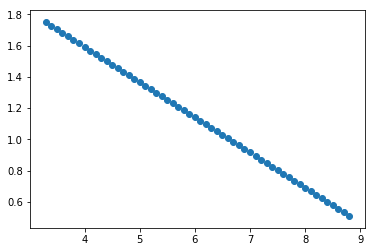

In [64]:
plt.scatter(x1, result)

- 속성이 3개이므로 w 의 값은 3개이다.
> $pred\_y = w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 + b$

- train_test_split() 함수를 호출할 때 마다 훈련세트/테스트세트 가 새롭게 구성되므로 score 가 달라질 수 있고 학습 보다 테스트 시 더 score 가 높은 경우도 있다.
- 다양한 선형회귀 모델은 다음 URL 을 참고하자. (http://scikit-learn.org/stable/modules/linear_model.html)
- 선형회귀의 변종인 릿지회귀와 라쏘회귀는 뒤에서 다룬다.
- 2차곡선, 3차곡선 과 같이 다항식을 적용한 다항회귀도 있다. (위 URL의 1.1.16 참고)

- 선형회귀에서 사용하는 선형 알고리즘은 다른 많은 머신러닝 알고리즘의 기반이 된다.
- 특히 신경망의 핵심 알고리즘은 선형회귀에서 나온 것이며, 가장 간단한 신경망은 곧 선형회귀와 같다.